# Study Guide
  In this notebook, I attemt to get a hang of the basic usage for matplotlib and pandas.

In [1]:
import pandas as pd

## Pandas
  **Pandas has two basic data structures: Series and DataFrame**
  ### Series
  Series are like arrays and lists, each row consists of a ***index*** and a ***value***. Series has the following traits:
  - The indices can be of type integer, string, date etc.. If not explicitly assigned a index, then pandas will automatically assign a integer index staring from 0.
  - Series can hold data of different types.
  - The size of Series cannot change after creation(granted, you can append to series, but use concatenations instead).
  - You can use NaN as missing data in series

In [2]:
# Creation
pd.Series(data=None, index=None, dtype=None, name=None, copy=False)

# Creation with lists
data = ['hello', 2, 5]
index = [1, 2, 3]

s1 = pd.Series(data=data, index=index)
print(s1)
print()
print(s1[1], s1[2], s1[3])

1    hello
2        2
3        5
dtype: object

hello 2 5


In [3]:
# Creation with dictionaries
dict = {1: 'Eric', 'Nancy': 10}

s2 = pd.Series(dict)
print(s2)

1        Eric
Nancy      10
dtype: object


In [4]:
# Creation with a subset of dictionaries
dict2 = {1: 1, 2: 2, 3: 3}

s3 = pd.Series(dict2, index=[1, 2])
print(s3)

1    1
2    2
dtype: int64


**We can also create Series with other data structures, such as numpy vectors**

---

In addition, Series supports a wide range of operations:
- Elemental

In [5]:
series = pd.Series(data=[1, 2, 3, 4])

# 算术运算
result = series * 2  # 所有元素乘以2
print(result)

# 数学函数
import numpy as np
result = np.sqrt(series)  # 对每个元素取平方根
print(result)

0    2
1    4
2    6
3    8
dtype: int64
0    1.000000
1    1.414214
2    1.732051
3    2.000000
dtype: float64


- Indexing

In [6]:
# 指定索引创建 Series
s = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])

# 获取值
value = s["a"]  # 获取索引为2的值
print(s["a"])  # 返回索引标签 'a' 对应的元素

# 获取多个值
subset = s[1:4]  # 获取索引为1到3的值

# 使用自定义索引
value = s["b"]  # 获取索引为'b'的值

# 索引和值的对应关系
for index, value in s.items():
    print(f"Index: {index}, Value: {value}")

# 使用切片语法来访问 Series 的一部分
print(s["a":"c"])  # 返回索引标签 'a' 到 'c' 之间的元素
print(s[:3])  # 返回前三个元素

# 为特定的索引标签赋值
s["a"] = 10  # 将索引标签 'a' 对应的元素修改为 10

# 通过赋值给新的索引标签来添加元素
s["e"] = 5  # 在 Series 中添加一个新的元素，索引标签为 'e'

# 使用 del 删除指定索引标签的元素。
del s["a"]  # 删除索引标签 'a' 对应的元素

# 使用 drop 方法删除一个或多个索引标签，并返回一个新的 Series。
s_dropped = s.drop(["b"])  # 返回一个删除了索引标签 'b' 的新 Series

1
Index: a, Value: 1
Index: b, Value: 2
Index: c, Value: 3
Index: d, Value: 4
a    1
b    2
c    3
dtype: int64
a    1
b    2
c    3
dtype: int64


- Statistical Analysis

In [7]:
print(s.sum())  # 输出 Series 的总和
print(s.mean())  # 输出 Series 的平均值
print(s.max())  # 输出 Series 的最大值
print(s.min())  # 输出 Series 的最小值
print(s.std())  # 输出 Series 的标准差

14
3.5
5
2
1.2909944487358056


- Boolean Operations

In [8]:
print(s > 2)  # 返回一个布尔 Series，其中的元素值大于 2

# 过滤
filtered_series = series[series > 2]  # 选择大于 2 的元素
print(result)

b    False
c     True
d     True
e     True
dtype: bool
0    1.000000
1    1.414214
2    1.732051
3    2.000000
dtype: float64


- Type Operations

In [9]:
print(s.dtype)  # 输出 Series 的数据类型

s = s.astype('float64')  # 将 Series 中的所有元素转换为 float64 类型
print(s)

int64
b    2.0
c    3.0
d    4.0
e    5.0
dtype: float64


- Other Attributes and Methods

In [10]:
# 获取索引
index = s.index

# 获取值数组
values = s.values

# 获取描述统计信息
stats = s.describe()
print(stats)

# 获取最大值和最小值的索引
max_index = s.idxmax()
min_index = s.idxmin()

# 其他属性和方法
print(s.dtype)   # 数据类型
print(s.shape)   # 形状
print(s.size)    # 元素个数
print(s.head())  # 前几个元素，默认是前 5 个
print(s.tail())  # 后几个元素，默认是后 5 个

count    4.000000
mean     3.500000
std      1.290994
min      2.000000
25%      2.750000
50%      3.500000
75%      4.250000
max      5.000000
dtype: float64
float64
(4,)
4
b    2.0
c    3.0
d    4.0
e    5.0
dtype: float64
b    2.0
c    3.0
d    4.0
e    5.0
dtype: float64


  ### DataFrame
  DataFrame is another core data structure in Pandas, used to represent a two-dimensional table.
  - The data stored in DataFrame can be of different types.
  - The data can be accessed with a row index and a column index.

In [11]:
# Creation: DataFrames can be built out of 2-d lists, dictionaries, np 2-d arrays and Series.
pd.DataFrame(data=None, columns=None, index=None, copy=False, dtype=None)

lst = [['Google', 10], ['Runoob', 12], ['Wiki', 13]]
dict_1 = {'Site':['Google', 'Runoob', 'Wiki'], 'Age':[10, 12, 13]} # Dicts of lists
dict_2 = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}] # Lists of dicts
ndarray_data = np.array([
    ['Google', 10],
    ['Runoob', 12],
    ['Wiki', 13]
])

print(pd.DataFrame(lst))
print(pd.DataFrame(dict_1, index=[1, 2, 3])) # Specify Indices
print(pd.DataFrame(dict_2))
print(pd.DataFrame(ndarray_data))

        0   1
0  Google  10
1  Runoob  12
2    Wiki  13
     Site  Age
1  Google   10
2  Runoob   12
3    Wiki   13
   a   b     c
0  1   2   NaN
1  5  10  20.0
        0   1
0  Google  10
1  Runoob  12
2    Wiki  13


In [12]:
s1 = pd.Series(['Alice', 'Bob', 'Charlie'])
s2 = pd.Series([25, 30, 35])
s3 = pd.Series(['New York', 'Los Angeles', 'Chicago'])

print(pd.DataFrame({'Name': s1, 'Age': s2, 'City': s3}))

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


Similarly, there are a lot of operations you can perfor on a DataFrame:
- Loc Attribute

In [13]:
data = {"calories": [420, 380, 390], "duration": [50, 40, 45]}

# 数据载入到 DataFrame 对象
df = pd.DataFrame(data)

# 返回第一行(Regardless of index)
print(df.loc[0])
# 返回第二行
print(df.loc[1])
# 返回第一行和第二行
print(df.loc[[0, 1]])

calories    420
duration     50
Name: 0, dtype: int64
calories    380
duration     40
Name: 1, dtype: int64
   calories  duration
0       420        50
1       380        40


- Indexing

In [14]:
df = pd.DataFrame(
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=["Column1", "Column2", "Column3"]
)
print(df)

# 通过列名访问
print(df['Column1'])

# 通过 .loc[] 访问
print(df.loc[:, 'Column1'])

# 通过 .iloc[] 访问
print(df.iloc[:, 0])  # 假设 'Column1' 是第一列

# 通过 .loc[] 访问行
print(df.loc[1])

# 访问单个元素
print(df['Column1'][0])

# 通过标签访问单个元素
print(df.loc[0, 'Column1'])

   Column1  Column2  Column3
0        1        2        3
1        4        5        6
2        7        8        9
0    1
1    4
2    7
Name: Column1, dtype: int64
0    1
1    4
2    7
Name: Column1, dtype: int64
0    1
1    4
2    7
Name: Column1, dtype: int64
Column1    4
Column2    5
Column3    6
Name: 1, dtype: int64
1
1


- Attributes and Methods

In [15]:
# DataFrame 的属性和方法
print(df.shape)     # 形状
print(df.columns)   # 列名
print(df.index)     # 索引
print(df.head())    # 前几行数据，默认是前 5 行
print(df.tail())    # 后几行数据，默认是后 5 行
print(df.info())    # 数据信息
print(df.describe())# 描述统计信息
print(df.mean())    # 求平均值
print(df.sum())     # 求和

(3, 3)
Index(['Column1', 'Column2', 'Column3'], dtype='object')
RangeIndex(start=0, stop=3, step=1)
   Column1  Column2  Column3
0        1        2        3
1        4        5        6
2        7        8        9
   Column1  Column2  Column3
0        1        2        3
1        4        5        6
2        7        8        9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Column1  3 non-null      int64
 1   Column2  3 non-null      int64
 2   Column3  3 non-null      int64
dtypes: int64(3)
memory usage: 200.0 bytes
None
       Column1  Column2  Column3
count      3.0      3.0      3.0
mean       4.0      5.0      6.0
std        3.0      3.0      3.0
min        1.0      2.0      3.0
25%        2.5      3.5      4.5
50%        4.0      5.0      6.0
75%        5.5      6.5      7.5
max        7.0      8.0      9.0
Column1    4.0
Column2    5.0
Column3    6.

- For further introduction, pls check documentation

### Pandas CSV
Comma-Seperated Values(CSV) files store data as pure text. Pandas can deal with CSV files easily.

In [16]:
data = pd.read_csv('nba.csv')

print(data.to_string())

                         Name                    Team  Number Position   Age Height  Weight                College      Salary
0               Avery Bradley          Boston Celtics     0.0       PG  25.0    6-2   180.0                  Texas   7730337.0
1                 Jae Crowder          Boston Celtics    99.0       SF  25.0    6-6   235.0              Marquette   6796117.0
2                John Holland          Boston Celtics    30.0       SG  27.0    6-5   205.0      Boston University         NaN
3                 R.J. Hunter          Boston Celtics    28.0       SG  22.0    6-5   185.0          Georgia State   1148640.0
4               Jonas Jerebko          Boston Celtics     8.0       PF  29.0   6-10   231.0                    NaN   5000000.0
5                Amir Johnson          Boston Celtics    90.0       PF  29.0    6-9   240.0                    NaN  12000000.0
6               Jordan Mickey          Boston Celtics    55.0       PF  21.0    6-8   235.0                    

We can also output a DataFarme as a CSV file.

In [17]:
# 三个字段 name, site, age
nme = ["Google", "Runoob", "Taobao", "Wiki"]
st = ["www.google.com", "www.runoob.com", "www.taobao.com", "www.wikipedia.org"]
ag = [90, 40, 80, 98]

# 字典
dict = {"name": nme, "site": st, "age": ag}

df = pd.DataFrame(dict)

# 保存 dataframe
df.to_csv("site.csv")

In [18]:
print(pd.read_csv("site.csv"))

   Unnamed: 0    name               site  age
0           0  Google     www.google.com   90
1           1  Runoob     www.runoob.com   40
2           2  Taobao     www.taobao.com   80
3           3    Wiki  www.wikipedia.org   98


Pandas can also read from a range of sources. For more information, read the documentations.

## Matplotlib

Matplotlib is the graphical library of python. You can draw static/dynamic/interactive graphs with it. Combined with Numpy and Scipy, Matplotlib can be used as a replacement for Matlab, forming a powerful scientific calculation environment. 

- Drawing Lines

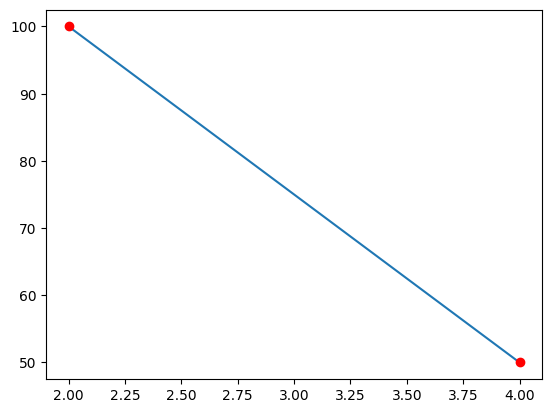

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

x_points = np.array([2, 4])
y_points = np.array([100, 50])

plt.plot(x_points, y_points) # Draw a line
plt.plot(x_points, y_points, 'ro') # Draw two red dots
plt.show()

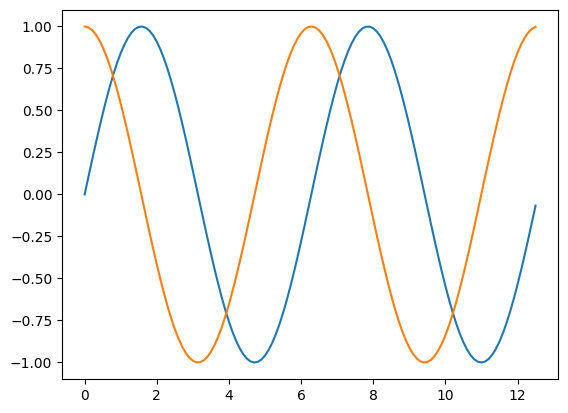

In [20]:
# Drawing Triangular Functions
x = np.arange(0, 4 * np.pi, 0.1)
y_1 = np.sin(x)
y_2 = np.cos(x)

plt.plot(x, y_1, x, y_2)
plt.show()

We can make plot notations to diversify the plot, for further information, see the documentations(The various parameters of the `plot` mathod)

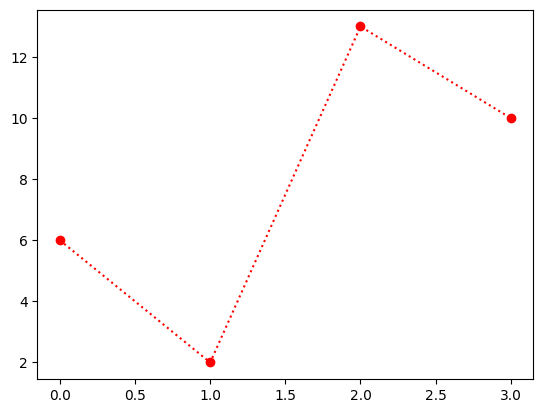

In [21]:
ypoints = np.array([6, 2, 13, 10])

plt.plot(ypoints, 'o:r')
plt.show()

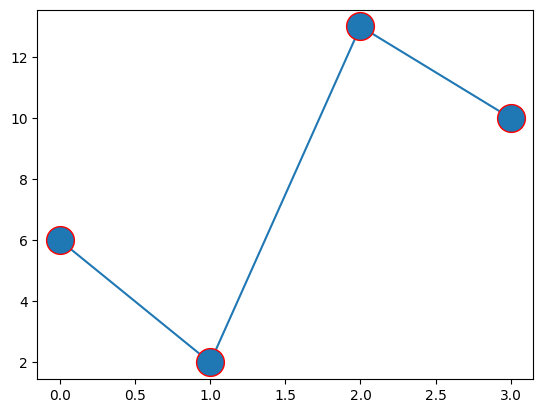

In [22]:
ypoints = np.array([6, 2, 13, 10])

plt.plot(ypoints, marker = 'o', ms = 20, mec = 'r')
plt.show()

- Labels and Titles
  
  We can set labels for the x axis and the y axis with the `xlabel()` and the `ylabel()` methods.

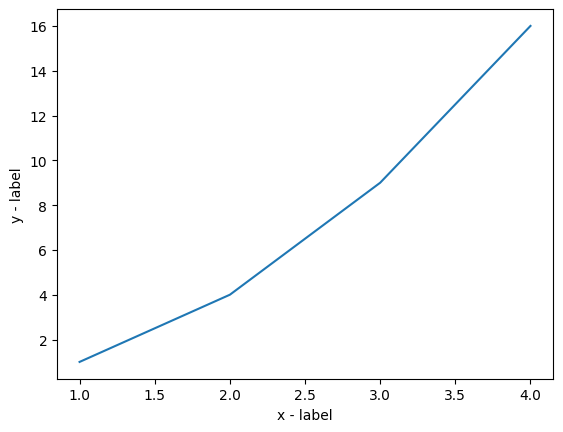

In [23]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
plt.plot(x, y)

plt.xlabel("x - label")
plt.ylabel("y - label")

plt.show()

  We can set the labels for our plots with the `title()` method.

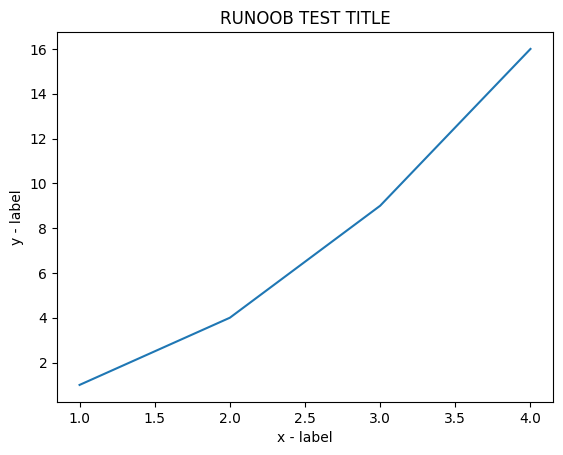

In [24]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
plt.plot(x, y)

plt.title("RUNOOB TEST TITLE")
plt.xlabel("x - label")
plt.ylabel("y - label")

plt.show()

  For more styling details, check out the documentations.

- Grid Lines
  
  We can use `grid()` method to set the grid lines.

  ```python
    plt.grid(b=None, which='major', axis='both')
  ```
  Parameters:
    1. `b`: Boolean value, determines whether the grid is visible
    2. `which`: I don't really understand. Default "major"
    3. `axis`: The direction of the grid.
    4. `*kwargs`: Styling

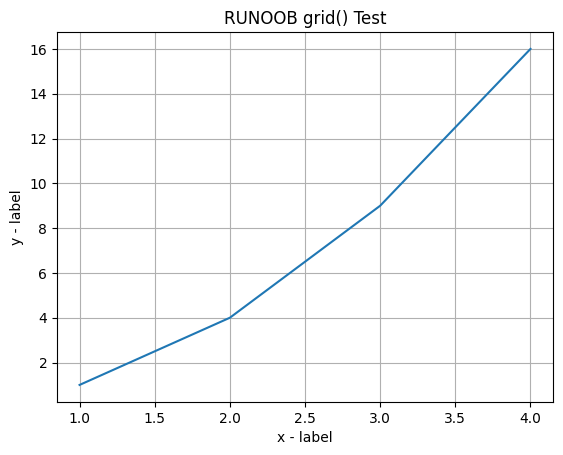

In [25]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])


plt.title("RUNOOB grid() Test")
plt.xlabel("x - label")
plt.ylabel("y - label")

plt.plot(x, y)

plt.grid()

plt.show()

- Subplots
  
  We can use `subplot()` and `subplots()` methods to draw subplots.

  - `subplot()`
    
    Draws one subplot at a time.

    ```python
    plt.subplot(nrows, ncols, index, **kwargs) # For other parameters, checkout the documentations.
    ```
    Parameters:
      1. `nrows`, `ncols`: Describes how many subplots there is each row/column.
      2. `index`: The index of the subplot being processed.
      3. `**kwargs`
  - `subplots()`

    Draws multiple subplots at a time.

    ```python
    plt.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    ```
    Parameters:
      1. `nrows`, `ncols`: Describes how many subplots there is each row/column.
      2. `sharex`, `sharey`: Boolean, determines whether the subplots share attributes. Can be set to 'none', 'all', 'col', 'row'.
      3. `squeeze`: Boolean, I don't understand, see documents.
      4. `subplot_kw`, `gridspec_kw`: Dictionaries, see documentation.
      5. `**fig_kw`: Pass the parameters to a `fig()` function.

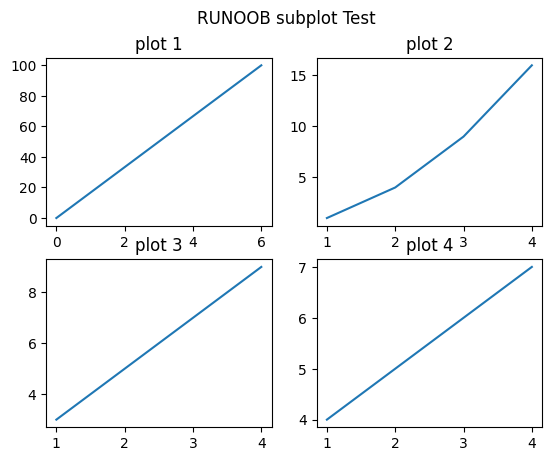

In [26]:
#plot 1:
x = np.array([0, 6])
y = np.array([0, 100])

plt.subplot(2, 2, 1)
plt.plot(x,y)
plt.title("plot 1")

#plot 2:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])

plt.subplot(2, 2, 2)
plt.plot(x,y)
plt.title("plot 2")

#plot 3:
x = np.array([1, 2, 3, 4])
y = np.array([3, 5, 7, 9])

plt.subplot(2, 2, 3)
plt.plot(x,y)
plt.title("plot 3")

#plot 4:
x = np.array([1, 2, 3, 4])
y = np.array([4, 5, 6, 7])

plt.subplot(2, 2, 4)
plt.plot(x,y)
plt.title("plot 4")

plt.suptitle("RUNOOB subplot Test")
plt.show()

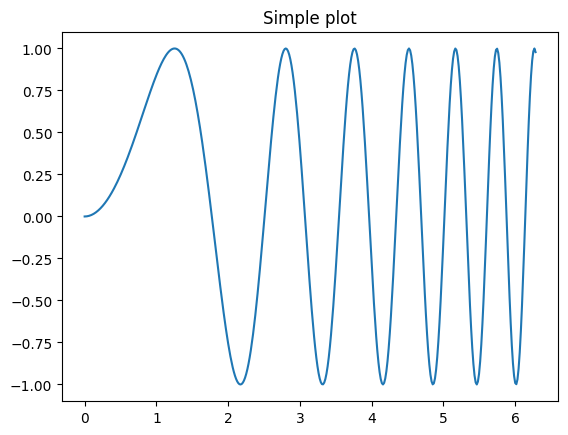

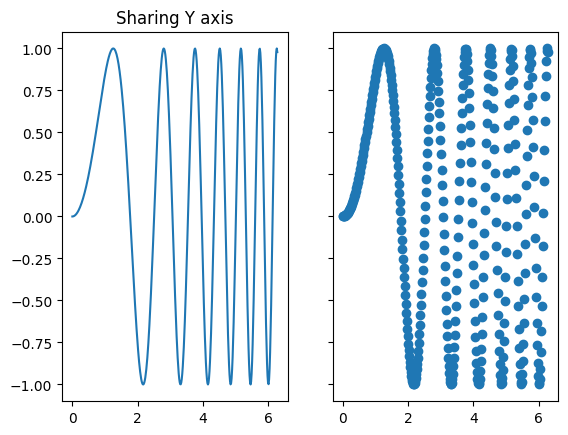

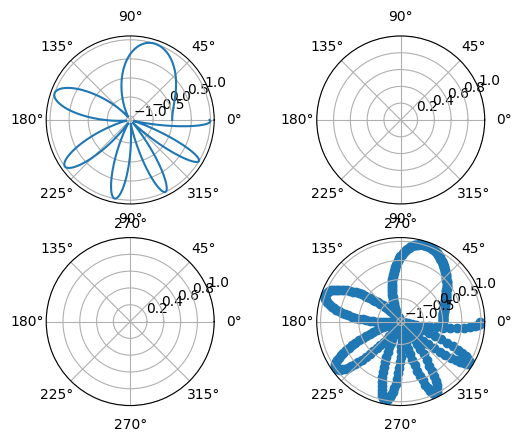

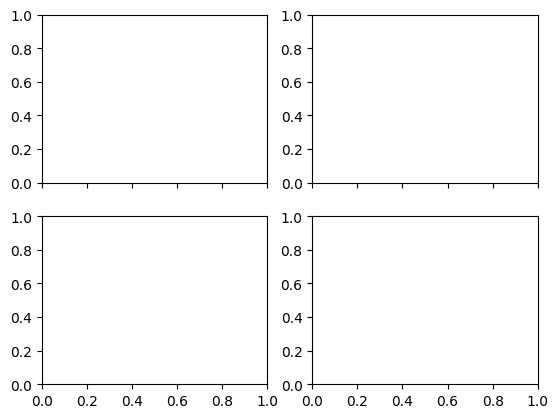

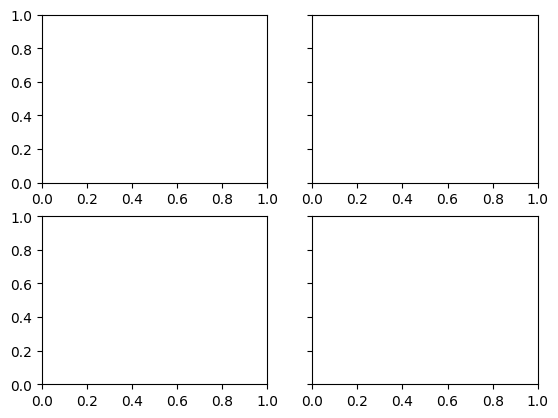

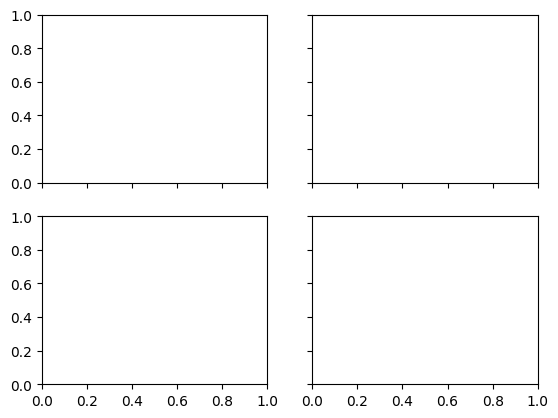

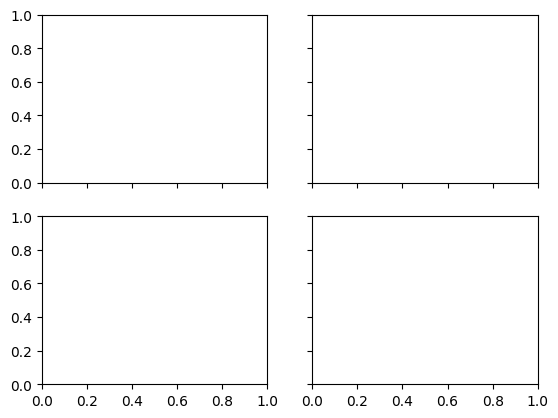

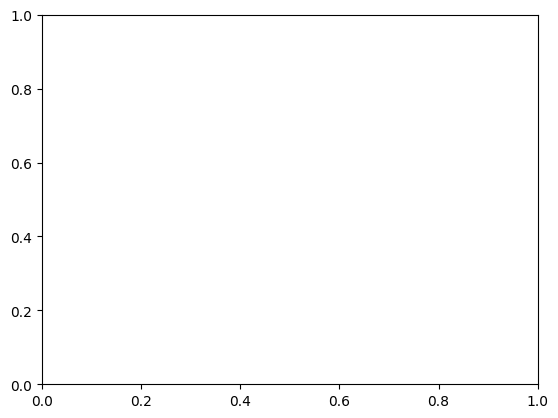

In [2]:
# 创建一些测试数据 -- 图1
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# 创建一个画像和子图 -- 图2
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# 创建两个子图 -- 图3
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# 创建四个子图 -- 图4
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# 共享 x 轴
plt.subplots(2, 2, sharex='col')

# 共享 y 轴
plt.subplots(2, 2, sharey='row')

# 共享 x 轴和 y 轴
plt.subplots(2, 2, sharex='all', sharey='all')

# 这个也是共享 x 轴和 y 轴
plt.subplots(2, 2, sharex=True, sharey=True)

# 创建标识为 10 的图，已经存在的则删除
fig, ax = plt.subplots(num=10, clear=True)

plt.show()

- Bar Charts
  
  ```python
  plt.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
  ```
  Parameters:
    1. `x`: A list of type float. The x values of the data on the x axis
    2. `height`: A list of type float. The heights of the bars.
    3. `width`: A list of type float. The widths of the bars.
    4. `bottom`: The starting value of the y axis. The default is 0.
    5. `align`: The way that the bars are aligned with the x axis.
    6. `*kwargs`

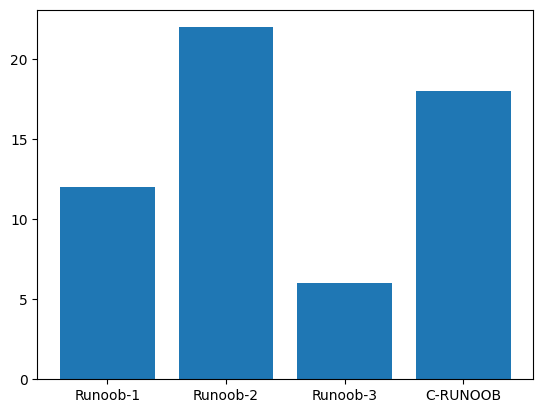

In [ ]:
x = np.array(["Runoob-1", "Runoob-2", "Runoob-3", "C-RUNOOB"])
y = np.array([12, 22, 6, 18])

plt.bar(x,y)
plt.show()

You can use the `barh()` method to set the direction of the bar chart.

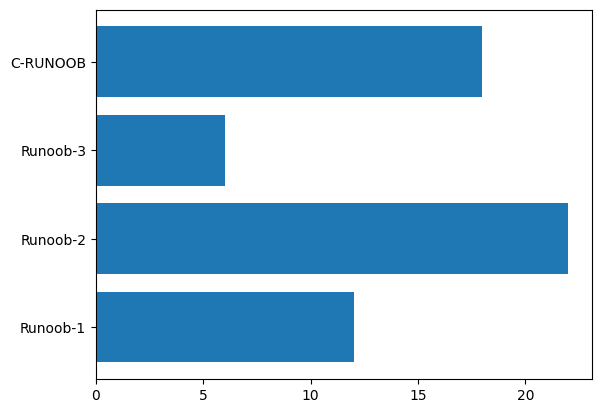

In [ ]:
x = np.array(["Runoob-1", "Runoob-2", "Runoob-3", "C-RUNOOB"])
y = np.array([12, 22, 6, 18])

plt.barh(x,y)
plt.show()

For other beautification, check out the official documentations.

- Pie Chart
  ```python
  plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=0, 0, frame=False, rotatelabels=False, *, normalize=None, data=None)[source]
  ```
  For parameter describtion, check out documentations

  Pie Charts also return three things:
    1. `wedges`: A list of sector objects.
    2. `texts`: A list of label objects.
    3. `autotexts`: A list of automatically generated label objects.

In [ ]:
y = np.array([35, 25, 25, 15])

plt.pie(y)
plt.show()

In [ ]:
y = np.array([35, 25, 25, 15])

plt.pie(
    y,
    labels=["A", "B", "C", "D"],  # 设置饼图标签
    colors=["#d5695d", "#5d8ca8", "#65a479", "#a564c9"],  # 设置饼图颜色
)
plt.title("RUNOOB Pie Test")  # 设置标题
plt.show()

We can emphasize the second sector and display the ratio.

In [ ]:
# 数据
sizes = [15, 30, 45, 10]

# 饼图的标签
labels = ['A', 'B', 'C', 'D']

# 饼图的颜色
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

# 突出显示第二个扇形
explode = (0, 0.1, 0, 0)

# 绘制饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# 标题
plt.title("RUNOOB Pie Test")

# 显示图形
plt.show()

- Histograms
  ```python
  matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, **kwargs)
  ```
  For parameter describtion, check out documentations

In [ ]:
# 生成一组随机数据
data = np.random.randn(1000)

# 绘制直方图
plt.hist(data, bins=30, color='skyblue', alpha=0.8)

# 设置图表属性
plt.title('RUNOOB hist() Test')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图表
plt.show()

In [ ]:
# 生成三组随机数据
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(2, 1, 1000)
data3 = np.random.normal(-2, 1, 1000)

# 绘制直方图
plt.hist(data1, bins=30, alpha=0.5, label='Data 1')
plt.hist(data2, bins=30, alpha=0.5, label='Data 2')
plt.hist(data3, bins=30, alpha=0.5, label='Data 3')

# 设置图表属性
plt.title('RUNOOB hist() TEST')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# 显示图表
plt.show()

Matplotlib can be used with Pandas.

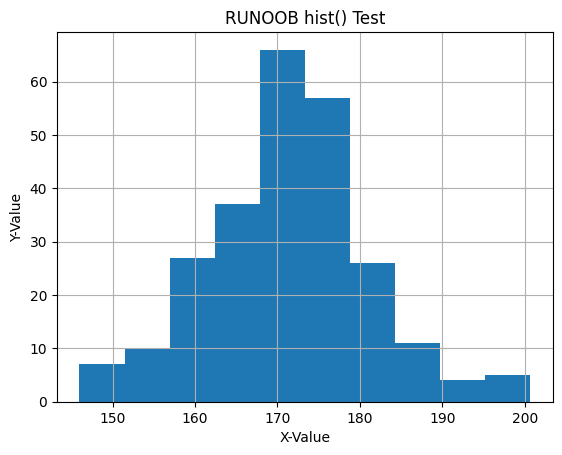

In [ ]:
# 使用 NumPy 生成随机数
random_data = np.random.normal(170, 10, 250)

# 将数据转换为 Pandas DataFrame
dataframe = pd.DataFrame(random_data)

# 使用 Pandas hist() 方法绘制直方图
dataframe.hist()


# 设置图表属性
plt.title("RUNOOB hist() Test")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")

# 显示图表
plt.show()

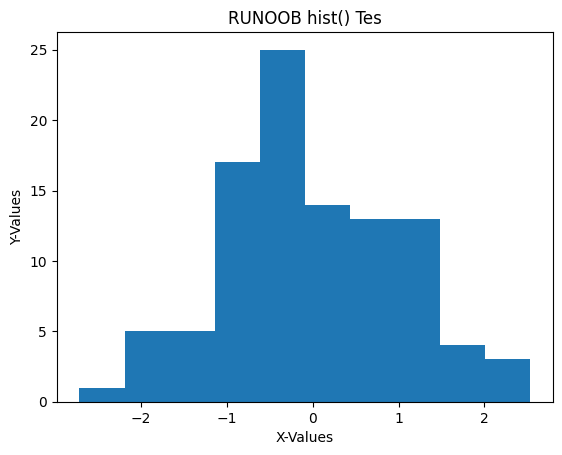

In [ ]:
# 生成随机数据
data = pd.Series(np.random.normal(size=100))

# 绘制直方图
# bins 参数指定了直方图中的柱子数量
plt.hist(data, bins=10)

# 设置图形标题和坐标轴标签
plt.title('RUNOOB hist() Tes')
plt.xlabel('X-Values')
plt.ylabel('Y-Values')

# 显示图形
plt.show()

For other functionalities, refer to the documentation.